In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

playstore_user_reviews = pd.read_csv("googleplaystore_user_reviews.csv")
playstore_app_data = pd.read_csv("googleplaystore.csv")


In [2]:
playstore_app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
playstore_user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
print('Dimentions of Google Play Apps: {}'.format(playstore_app_data.shape))
print('Unique App Names: {}'.format(len(playstore_app_data['App'].unique())))
print('\nDimentions of Google Play Reviews: {}'.format(playstore_user_reviews.shape))

Dimentions of Google Play Apps: (10841, 13)
Unique App Names: 9660

Dimentions of Google Play Reviews: (64295, 5)


In [30]:
#Check for Missing Values in App Data
print('Missing values in App Data:\n{}'.format(playstore_app_data.isnull().sum()))

Missing values in App Data:
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [31]:
#Check for Missing Values in User Reviews
print('Missing values in user_reviews:\n{}'.format(playstore_user_reviews.isnull().sum()))

Missing values in user_reviews:
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [10]:
#Remove the missing data
playstore_user_reviews.dropna(inplace=True)

In [11]:
#Remove the duplicates data for same App Name
playstore_app_data= playstore_app_data.drop_duplicates(subset='App')
playstore_app_data.shape

(9660, 13)

In [32]:
playstore_app_data.dropna(inplace=True,subset=['Type','Content Rating','Current Ver','Android Ver'])
playstore_app_data.shape

(9648, 13)

In [33]:
playstore_app_data['Rating'].describe()

count    9648.000000
mean        3.542651
std         1.574478
min         0.000000
25%         3.600000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [34]:
playstore_app_data.fillna(0,inplace=True)

In [35]:
playstore_app_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

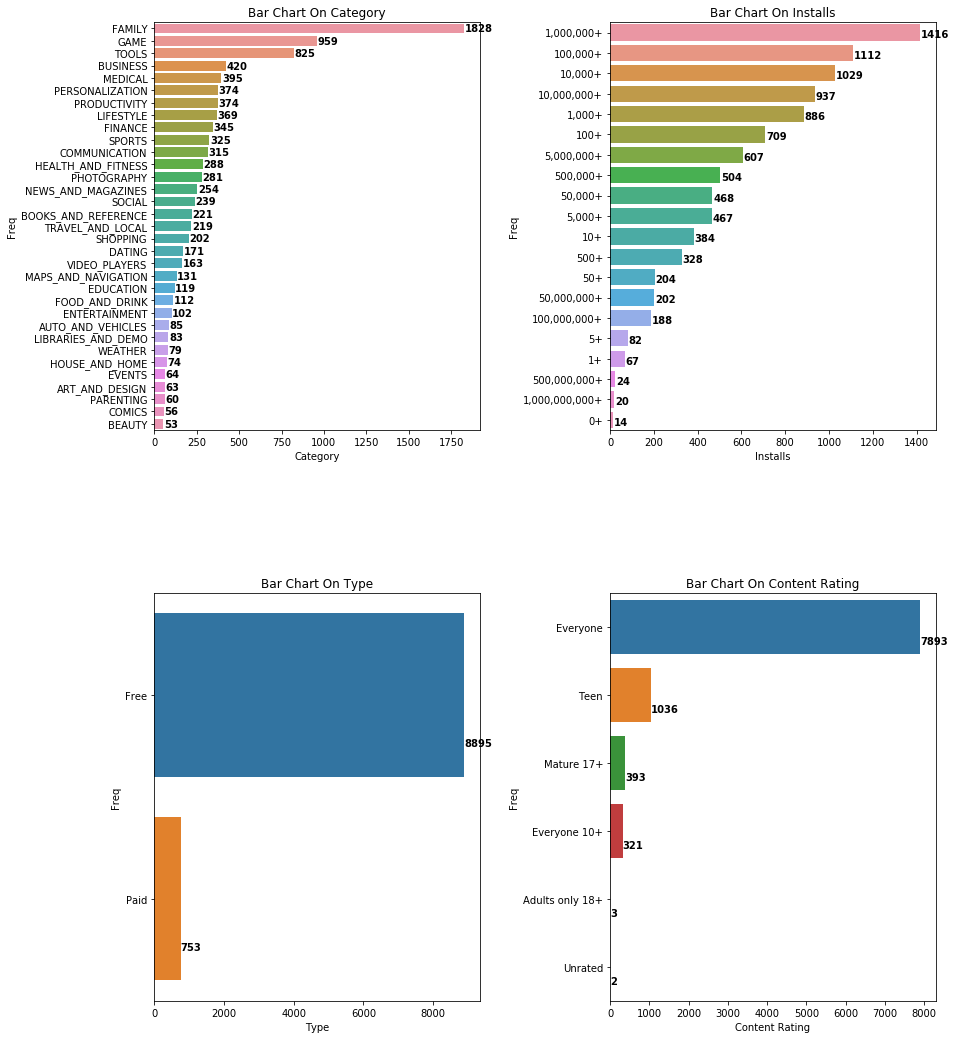

In [25]:
list_1 = ['Category', 'Installs', 'Type','Content Rating']

def bar_plot(x,y,y_label,x_label,title,color,ax):
    # plt.figure(figsize=(10,5))
    bar = sns.barplot(x = x,y=y,ax=ax,orient='h')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    for i, v in enumerate(x.values):
        ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    return bar

fig = plt.figure(figsize=(14,18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 1
for names in list_1:
    ax1 = fig.add_subplot(2, 2, i)
    df2 = playstore_data[names].value_counts()
    df2 = df2.reset_index()
    bar_plot(x = df2[names],y = df2['index'],y_label = 'Freq',title = 'Bar Chart On {}'.format(names),color='red',ax=ax1,x_label=names)
    i += 1

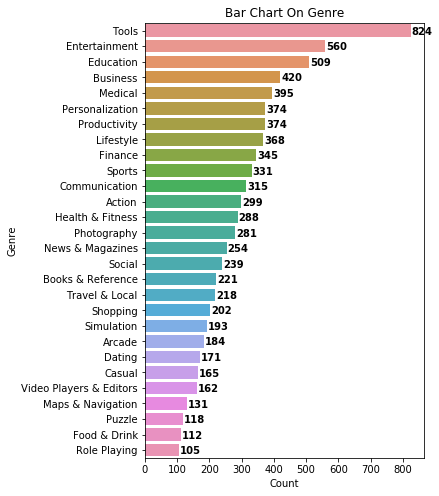

In [23]:
def bar_plot(x,y,y_label,x_label,title,color,ax=None):
    plt.figure(figsize=(5,8))
    bar = sns.barplot(x = x,y=y,orient='h')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    for i, v in enumerate(x.values):
        bar.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    return bar

df2 = playstore_app_data['Genres'].value_counts()
df2 = df2.reset_index()
df2 = df2[df2['Genres'] > 100]
bar_plot(x = df2['Genres'],y = df2['index'],y_label = 'Genre',title = 'Bar Chart On Genre',color='blue',x_label='Count')

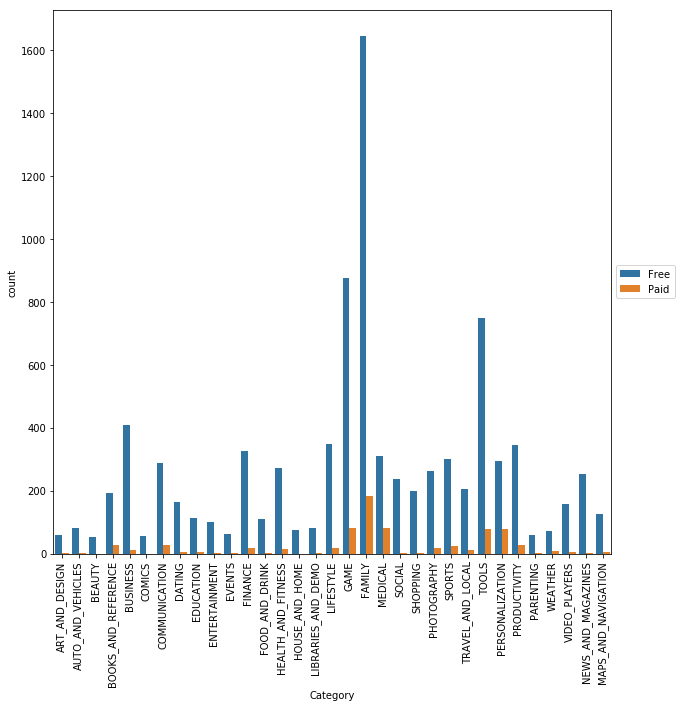

In [16]:
plt.figure(figsize =(10,10))
sns.countplot(playstore_app_data['Category'], hue= playstore_app_data['Type'])
plt.xticks(rotation = 90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

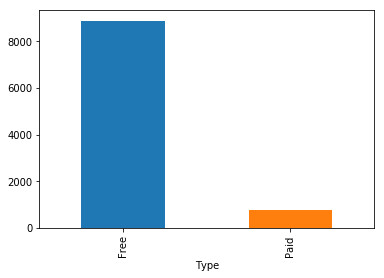

In [19]:
playstore_app_data.groupby(playstore_app_data['Type']).size().plot(kind='bar')

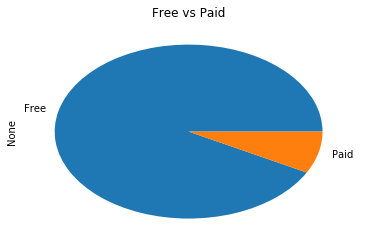

In [39]:
playstore_app_data.groupby(playstore_app_data['Type']).size().plot(kind='pie', title="Free vs Paid")

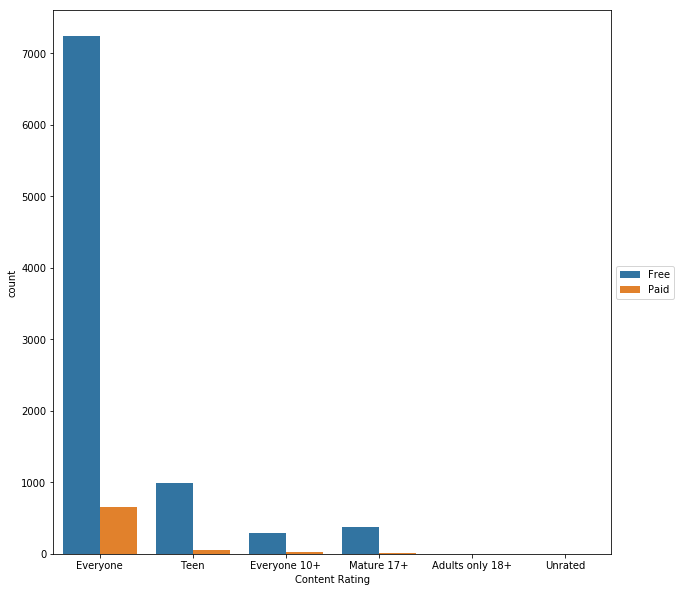

In [23]:
fig = plt.figure(figsize = (10,10))
sns.countplot(playstore_app_data['Content Rating'], hue = playstore_app_data['Type'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [27]:
sns.factorplot('Content Rating','Installs', size =15,hue = 'Type', kind = 'bar', data = playstore_app_data )
sns.set(style="whitegrid", font_scale=2.5)
plt.xticks(rotation = 90)

ValueError: Neither the `x` nor `y` variable appears to be numeric.